In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

print('Hi')

Matplotlib is building the font cache; this may take a moment.


Hi


In [20]:
%pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ------------------------------------ 104.0/104.0 kB 333.5 kB/s eta 0:00:00
   ---------------------------------------- 8.0/8.0 MB 525.6 kB/s eta 0:00:00
   -------------------------------------- 218.6/218.6 kB 532.8 kB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 2.2/2.2 MB 737.5 kB/s eta 0:00:00
   ---------------------------------------- 71.9/71.9 kB 994.3 kB/s eta 0:00:00
   ---------------------------------------- 2.6/2.6 MB 416.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests

url = "https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv"
response = requests.get(url)

with open("tmdb_5000_movies.csv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


In [110]:
import pandas as pd 
df = pd.read_csv(r'c:\Users\abhis\Downloads\tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [111]:
print(df.columns)
print(df.shape)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
(4803, 20)


In [112]:
df.isna().sum().sort_values()

budget                     0
title                      0
status                     0
spoken_languages           0
revenue                    0
production_countries       0
vote_average               0
popularity                 0
production_companies       0
original_title             0
original_language          0
keywords                   0
id                         0
genres                     0
vote_count                 0
release_date               1
runtime                    2
overview                   3
tagline                  844
homepage                3091
dtype: int64

In [113]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [114]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [115]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [116]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [117]:
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [118]:
def genres_and_keywords(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(g['name'].split()) for g in genres)

    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(k['name'].split()) for k in keywords)

    return "%s %s" % (genres, keywords)




In [119]:
df['string'] = df.apply(genres_and_keywords, axis= 1)
df['string']

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [120]:
df['string'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [121]:
tfidf = TfidfVectorizer(max_features=2000)

In [122]:
x = tfidf.fit_transform(df['string'])
x

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [123]:
print(x[0])

  (0, 10)	0.1762040466935279
  (0, 1114)	0.277382848565207
  (0, 180)	0.21696573949004844
  (0, 1641)	0.20547211662743248
  (0, 1068)	0.2589461449112578
  (0, 312)	0.277382848565207
  (0, 56)	0.26699983551812234
  (0, 1832)	0.28396319292529476
  (0, 50)	0.18527447977794834
  (0, 1652)	0.22178515065460125
  (0, 1484)	0.0961800172466409
  (0, 723)	0.2589461449112578
  (0, 1661)	0.228884812911084
  (0, 1638)	0.27181924668267515
  (0, 1654)	0.27181924668267515
  (0, 722)	0.20233170452309615
  (0, 437)	0.24431210994430547
  (0, 1531)	0.11510977007862505
  (0, 644)	0.12294608887976165
  (0, 26)	0.10088050912368217
  (0, 12)	0.0874731672898575


In [124]:
# generate a mapping from movie title -> index (in df)
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [125]:
df.query('title == "The Dark Knight"').index

Index([65], dtype='int64')

In [126]:
idx = movie2idx['The Dark Knight']
idx

65

In [127]:
query = x[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [128]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [129]:
scores = cosine_similarity(query, x)
scores

array([[0.00802006, 0.00841371, 0.04072317, ..., 0.00740177, 0.        ,
        0.        ]])

In [130]:
len(scores[0])

4803

In [131]:
scores = scores.flatten()

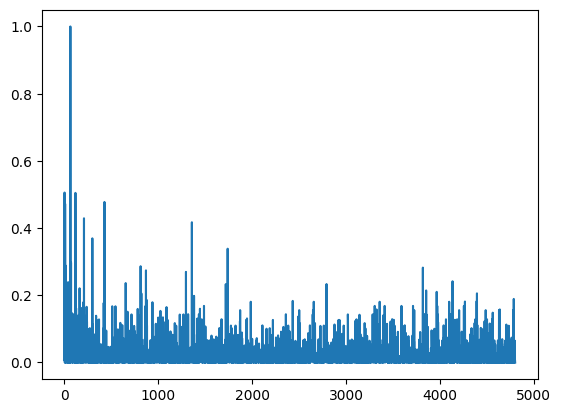

In [132]:
plt.plot(scores)

In [133]:
sorted_scores = (-scores).argsort()

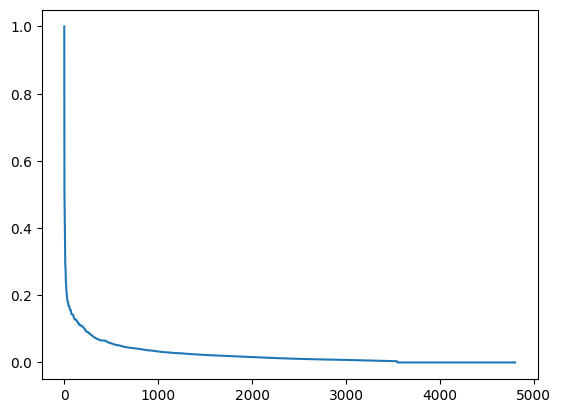

In [135]:
plt.plot(scores[sorted_scores])


In [138]:
recommended_idx = (-scores).argsort()[1:11]

In [139]:
df['title'].iloc[recommended_idx]

3                    The Dark Knight Rises
119                          Batman Begins
428                         Batman Returns
9       Batman v Superman: Dawn of Justice
210                         Batman & Robin
1359                                Batman
299                         Batman Forever
1740                            Kick-Ass 2
72                           Suicide Squad
10                        Superman Returns
Name: title, dtype: object

Done with playing around !!!

.<br>.<br>.

So, If I have to write all of it well, I'd go...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [19]:
def recommend_similar_movies(movie_name):
    try:
        if not isinstance(movie_name, str):
            raise ValueError("Please enter name in string (alphabetical) form")

        movies_df = pd.read_csv(r"D:\Datasets\tmdb_5000_movies.csv")

        def movie_genres_and_keywords(row):
            movie_genres = json.loads(row['genres'])
            movie_genres = ' '.join([''.join(mg['name'].split()) for mg in movie_genres])

            movie_keywords = json.loads(row['keywords'])
            movie_keywords = ' '.join([''.join(mk['name'].split()) for mk in movie_keywords])

            return "%s %s" % (movie_genres, movie_keywords)
        
        movies_df['info'] = movies_df.apply(movie_genres_and_keywords, axis=1)

        a = TfidfVectorizer(max_features=2000).fit_transform(movies_df['info'])

        def recommendations(movie):
            set_movies_idx = pd.Series(movies_df.index, index=movies_df['title'])

            if movie not in set_movies_idx:
                raise ValueError("We don't have that movie")
            
            movie_idx = set_movies_idx[movie]
            if type(movie_idx) == pd.Series:
                movie_idx =movie_idx.iloc[0]
            
            movie_query = a[movie_idx]
            similarity = cosine_similarity(movie_query,a)
            similarity = similarity.flatten()

            recommendations_idx = (-similarity).argsort()[1:11]

            return movies_df['title'].iloc[recommendations_idx]
        
        return recommendations(movie_name)
    
    except ValueError as e:
        return str(e)
    
    except Exception as e:
        return f"An unexpected error occurred: {str(e)}"
    
    
    

In [20]:
recommend_similar_movies('Iron Man')

79                              Iron Man 2
182                                Ant-Man
31                              Iron Man 3
126                   Thor: The Dark World
26              Captain America: Civil War
85     Captain America: The Winter Soldier
16                            The Avengers
174                    The Incredible Hulk
7                  Avengers: Age of Ultron
129                                   Thor
Name: title, dtype: object

In [21]:
recommend_similar_movies('Man of Steel')

10                        Superman Returns
9       Batman v Superman: Dawn of Justice
870                            Superman II
1296                          Superman III
511                                  X-Men
203                                     X2
813                               Superman
101                     X-Men: First Class
33                   X-Men: The Last Stand
232                          The Wolverine
Name: title, dtype: object

In [22]:
recommend_similar_movies(12345)

'Please enter name in string (alphabetical) form'

In [23]:
recommend_similar_movies('Phir Hera Pheri')

"We don't have that movie"

In [24]:
recommend_similar_movies('Fight Club')

1553                        Se7en
1002                      The One
4320             Dead Man's Shoes
3635                The Machinist
2313                     The Mask
4623              Death Race 2000
2047    Megiddo: The Omega Code 2
193                   After Earth
2740                  The New Guy
2381                   Salton Sea
Name: title, dtype: object

In [25]:
recommend_similar_movies('Cinderella')

1784                   Ever After: A Cinderella Story
917                                    Into the Woods
591                                          Stardust
1679                                  Grace of Monaco
3508                              A Shine of Rainbows
1423                                   Ella Enchanted
784     In the Name of the King: A Dungeon Siege Tale
1029                             Happily N'Ever After
769                  Sinbad: Legend of the Seven Seas
651                                             Annie
Name: title, dtype: object